# Introduction
### Asthma is a chronic respiratory disease that affects millions worldwide, causing symptoms like wheezing, coughing, and shortness of breath.
### This dataset contains information such as patient demographics, symptoms, medication use, and environmental factors. 
### Analyzing this data helps identify key patterns, risk factors, and supports better asthma diagnosis, management, and treatment strategies.



### - **Features include:**
###   - Age, Gender
###   - Smoking status
###   - Allergies
###  - Air pollution level
###   - Physical activity level
###   - Comorbidities
###   - Occupation type
###   - Target: `has_asthma` (0 = No, 1 = Yes)

### Import Libaries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
data = pd.read_csv("synthetic_asthma_dataset.csv")

In [34]:
data.drop('Patient_ID',axis=1,inplace=True)

In [35]:
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 10000
Number of columns: 16


In [36]:
data.head()

,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


In [37]:
data.tail()

,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
9995,70,Male,25.0,Never,0,NaN,Low,Sedentary,Indoor,NaN,0.67,0,580.6,18.7,0,NaN
9996,78,Female,24.8,Never,0,Pollen,Low,Moderate,Indoor,Diabetes,0.72,1,417.6,40.8,0,NaN
9997,58,Male,30.1,Former,1,Pollen,Low,Moderate,Indoor,NaN,0.28,0,459.1,20.3,1,Not Controlled
9998,88,Female,31.2,Former,0,Pollen,Moderate,Moderate,Indoor,NaN,0.44,0,415.9,25.0,0,NaN
9999,13,Female,16.4,Former,1,Multiple,High,Moderate,Outdoor,NaN,0.23,0,359.4,23.2,1,Not Controlled


In [38]:
data.describe()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.930700,25.053320,0.303400,0.497998,1.015900,400.884090,25.101420,0.243300
std,25.653559,4.874466,0.459749,0.224809,1.020564,97.531113,9.840184,0.429096
min,1.000000,15.000000,0.000000,0.000000,0.000000,150.000000,5.000000,0.000000
25%,23.000000,21.600000,0.000000,0.320000,0.000000,334.800000,18.200000,0.000000
50%,45.000000,25.000000,0.000000,0.500000,1.000000,402.500000,25.000000,0.000000
75%,67.000000,28.400000,1.000000,0.670000,2.000000,468.700000,31.700000,0.000000
max,89.000000,45.000000,1.000000,0.990000,6.000000,600.000000,63.900000,1.000000


In [39]:
data.describe(include = 'O')

,Gender,Smoking_Status,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Asthma_Control_Level
count,10000,10000,7064,10000,10000,10000,5033,2433
unique,3,3,4,3,3,2,3,3
top,Female,Never,Dust,Moderate,Sedentary,Indoor,Diabetes,Not Controlled
freq,4814,6070,2479,4915,4062,7035,2029,1229


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   BMI                      10000 non-null  float64
 3   Smoking_Status           10000 non-null  object 
 4   Family_History           10000 non-null  int64  
 5   Allergies                7064 non-null   object 
 6   Air_Pollution_Level      10000 non-null  object 
 7   Physical_Activity_Level  10000 non-null  object 
 8   Occupation_Type          10000 non-null  object 
 9   Comorbidities            5033 non-null   object 
 10  Medication_Adherence     10000 non-null  float64
 11  Number_of_ER_Visits      10000 non-null  int64  
 12  Peak_Expiratory_Flow     10000 non-null  float64
 13  FeNO_Level               10000 non-null  float64
 14  Has_Asthma             

In [41]:
data.isnull().sum()

Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                  2936
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities              4967
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
Asthma_Control_Level       7567
dtype: int64

# EDA

In [42]:
data.columns

Index(['Age', 'Gender', 'BMI', 'Smoking_Status', 'Family_History', 'Allergies',
       'Air_Pollution_Level', 'Physical_Activity_Level', 'Occupation_Type',
       'Comorbidities', 'Medication_Adherence', 'Number_of_ER_Visits',
       'Peak_Expiratory_Flow', 'FeNO_Level', 'Has_Asthma',
       'Asthma_Control_Level'],
      dtype='object')

In [43]:
data1 = data[['Age',  'BMI',  'Family_History','Medication_Adherence', 'Number_of_ER_Visits',
       'Peak_Expiratory_Flow', 'FeNO_Level', 'Asthma_Control_Level']]
data2 = data[['Gender', 'Smoking_Status', 'Allergies',
       'Air_Pollution_Level', 'Physical_Activity_Level', 'Occupation_Type',
       'Comorbidities','Peak_Expiratory_Flow','Asthma_Control_Level']]

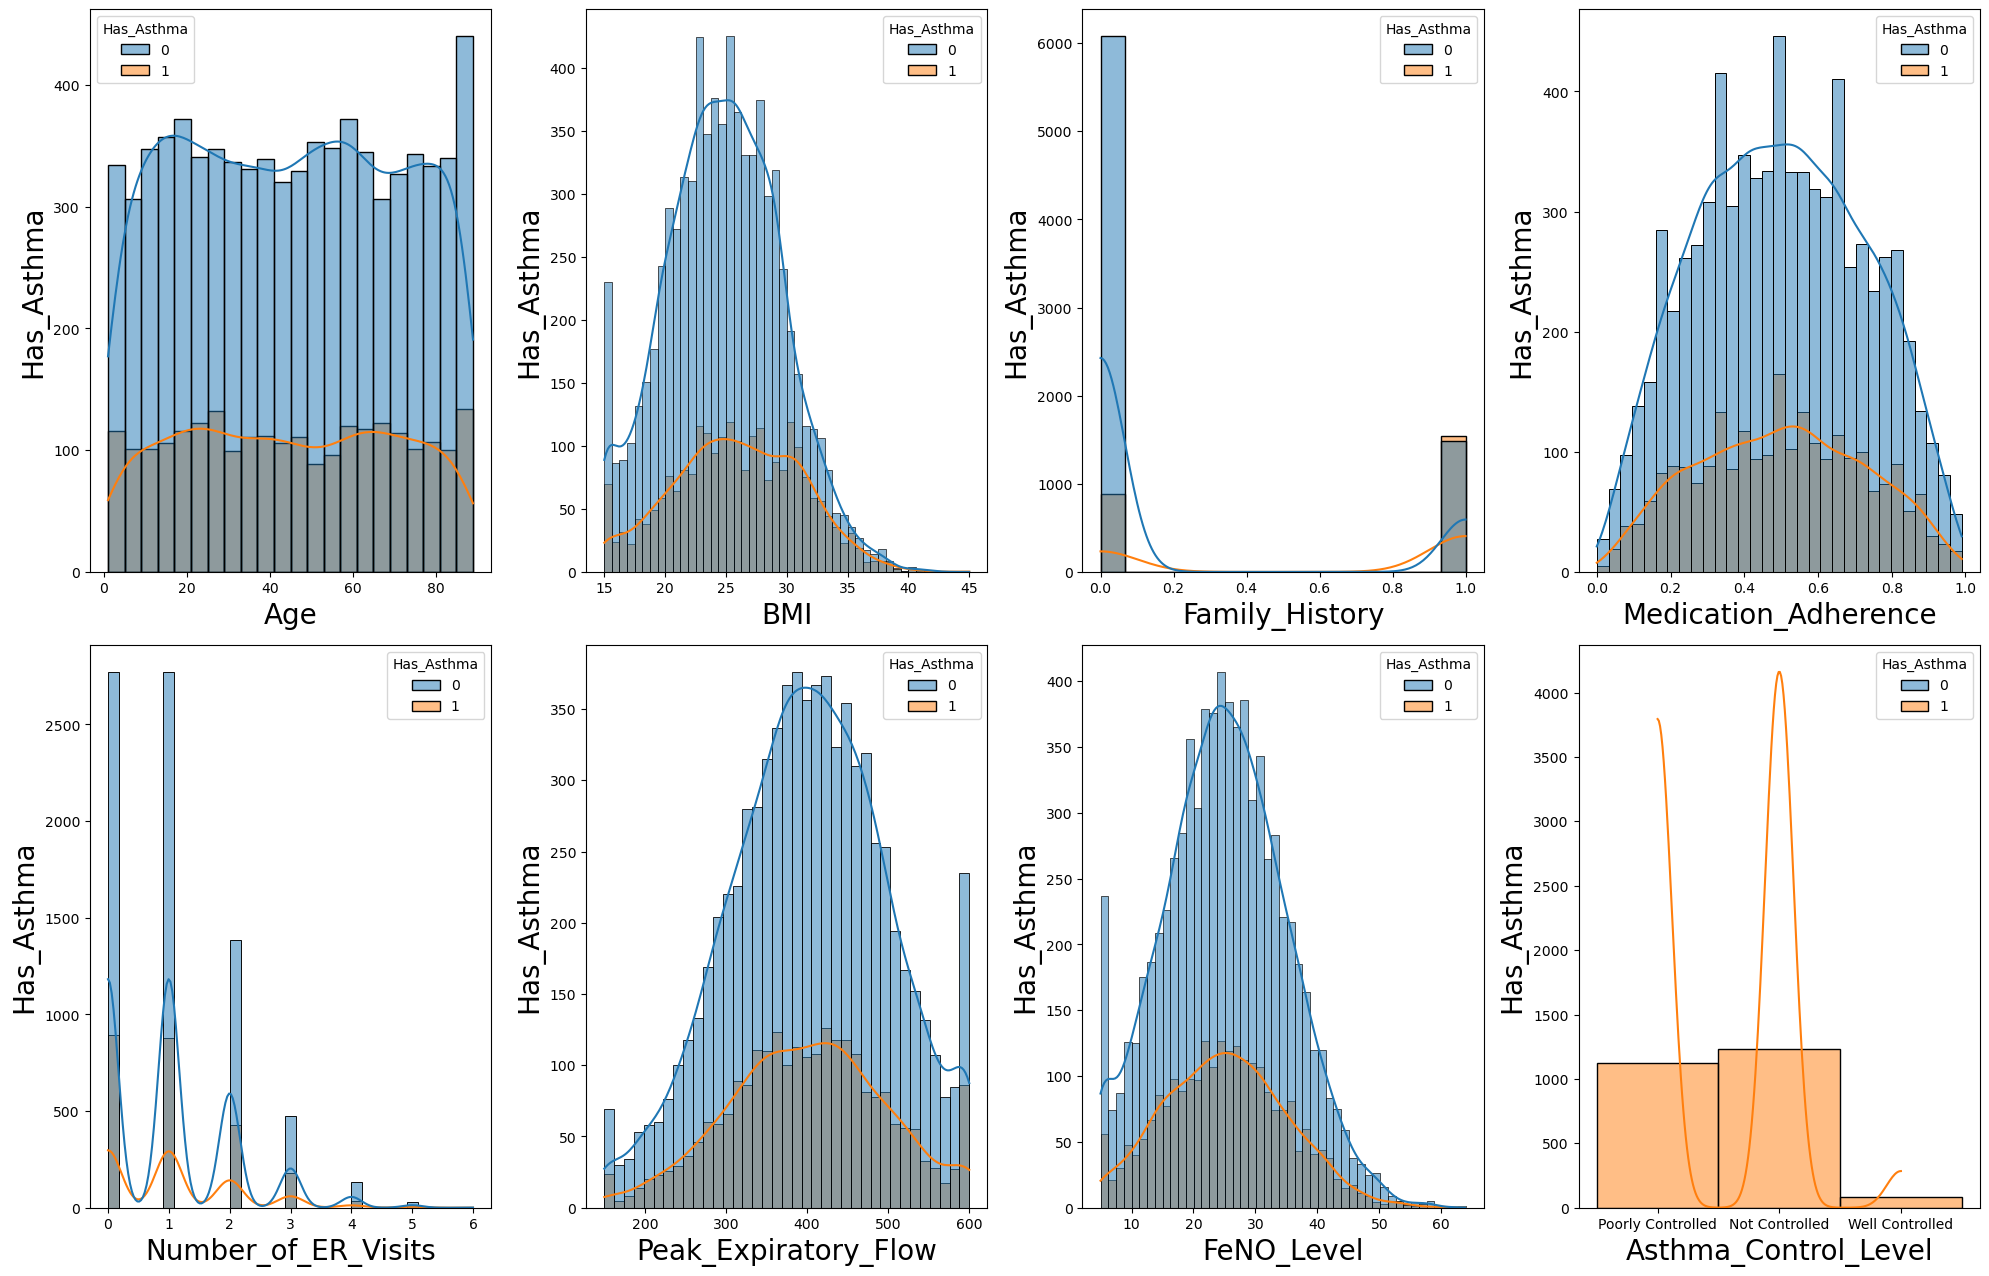

In [44]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data1:#accessing the columns 
    if plotnumber<=9 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data1[column],kde=True,hue=data['Has_Asthma'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Has_Asthma',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()
plt.show()

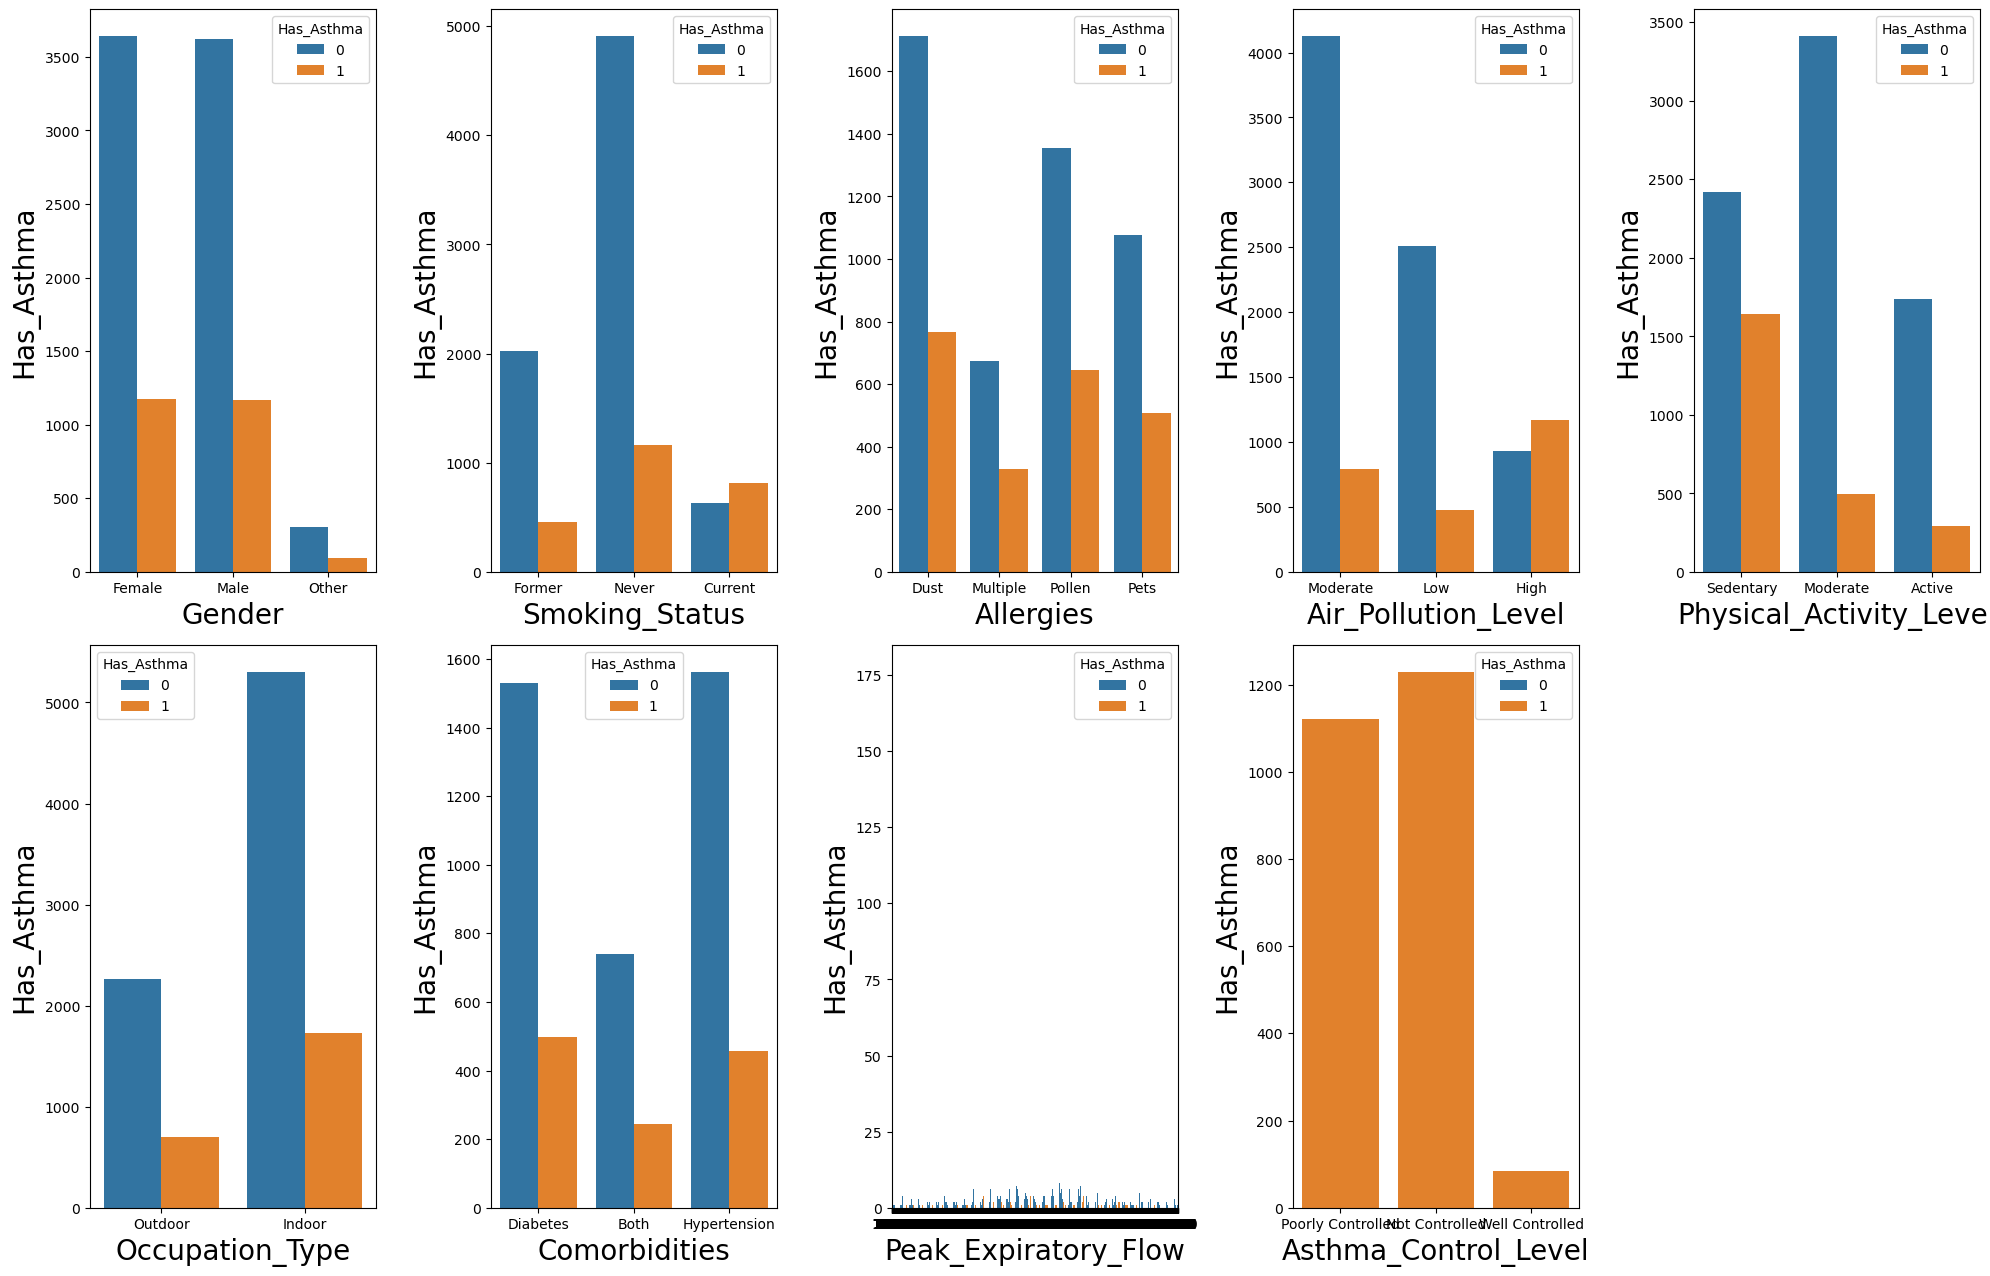

In [45]:
plt.figure(figsize=(20, 25), facecolor='white')  # Set the canvas size and background
plotnumber = 1  # Initialize subplot counter

for column in data2.columns:  # Iterate through each column of the DataFrame
    if plotnumber <= 10:
        ax = plt.subplot(4, 5, plotnumber)  # Create a subplot in a 3x2 grid
        sns.countplot(x=data2[column], hue=data['Has_Asthma'])  # Countplot with hue
        plt.xlabel(column, fontsize=20)  # Set x-axis label
        plt.ylabel('Has_Asthma', fontsize=20)  # Set y-axis label
        plotnumber += 1  # Increment counter

plt.tight_layout()  # Prevent overlapping of plots
plt.show()  # Display the figure

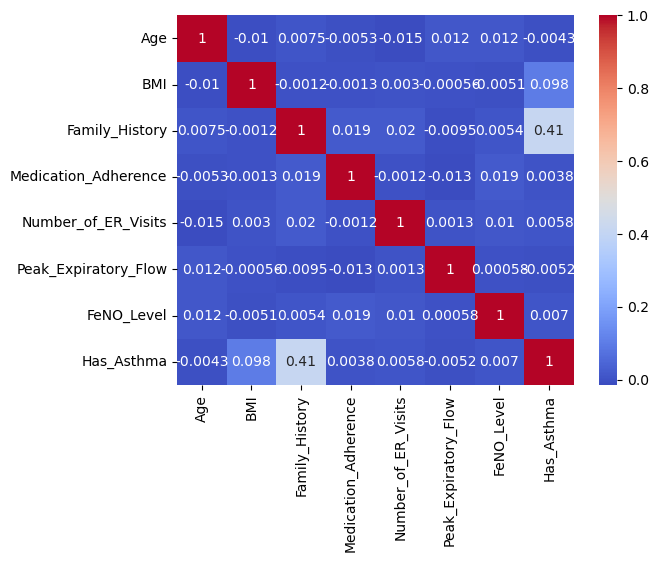

In [46]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

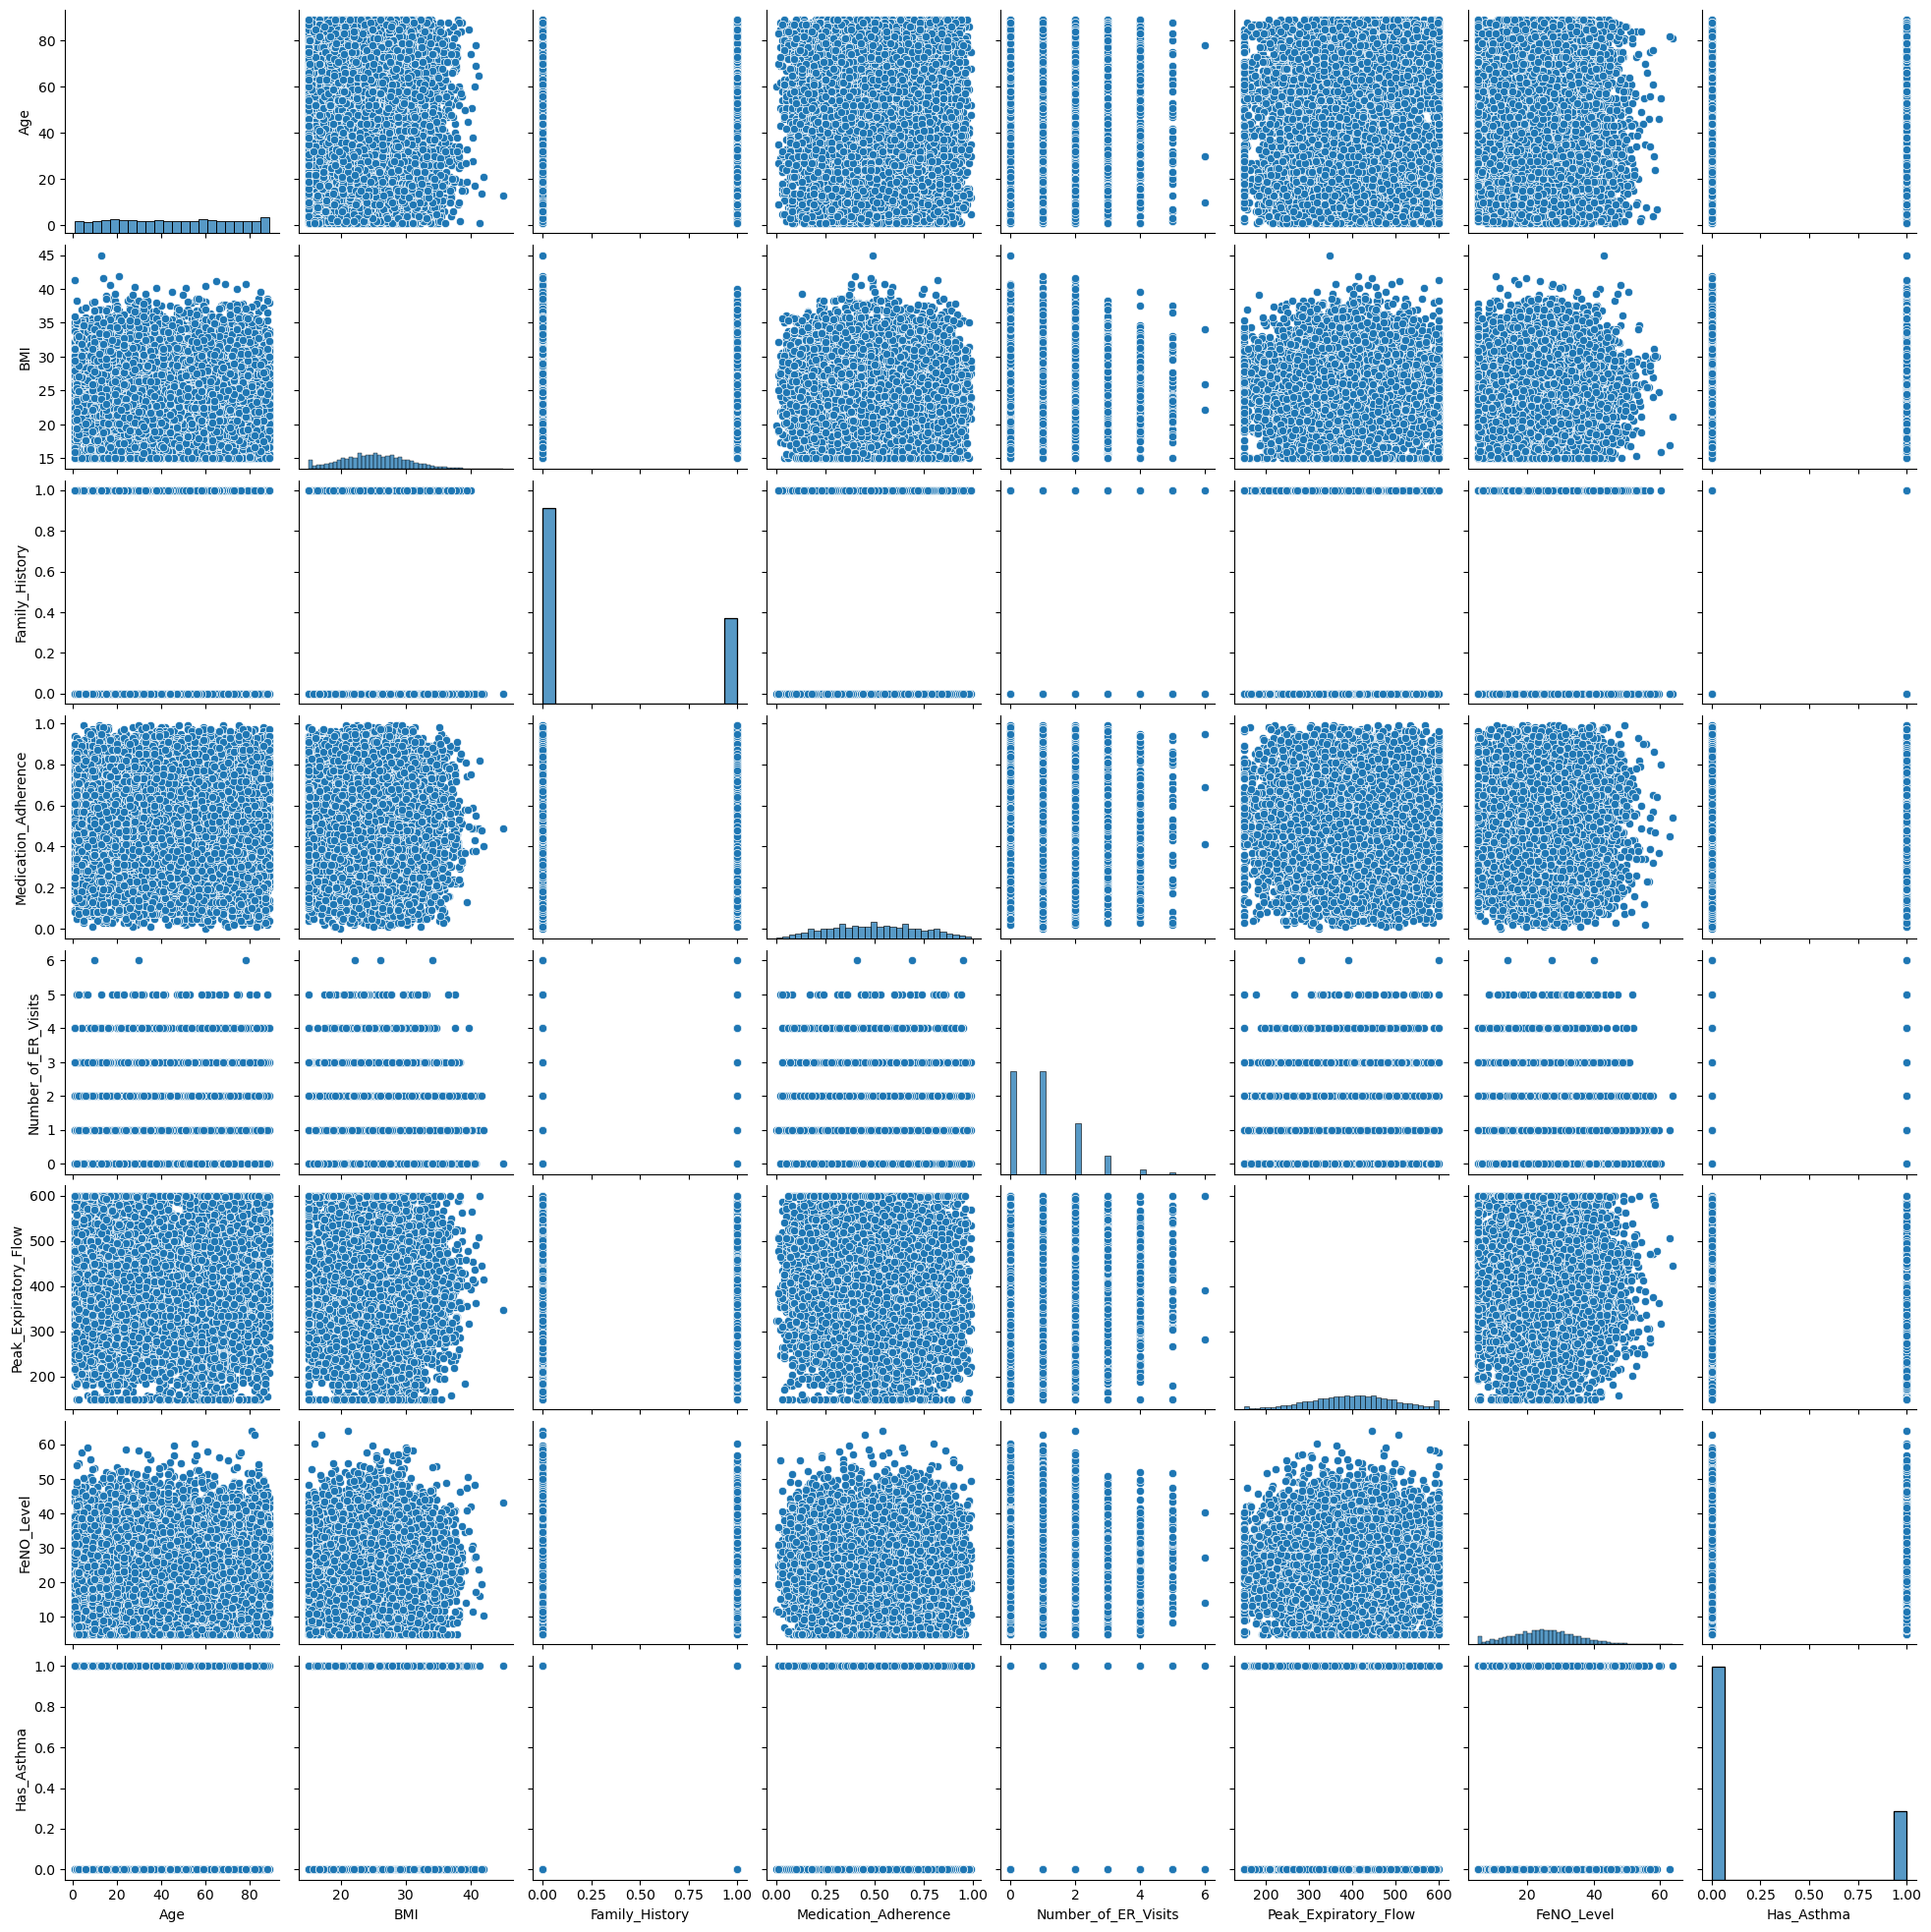

In [47]:
sns.pairplot(data)
plt.show()

# Handling Missing Value

In [48]:
data['Asthma_Control_Level'] = data['Asthma_Control_Level'].fillna("Not Asthma")
data['Comorbidities'] = data['Comorbidities'].fillna("Unknown")
data['Allergies'] = data['Allergies'].fillna("Unknown")

# Handling Outliers

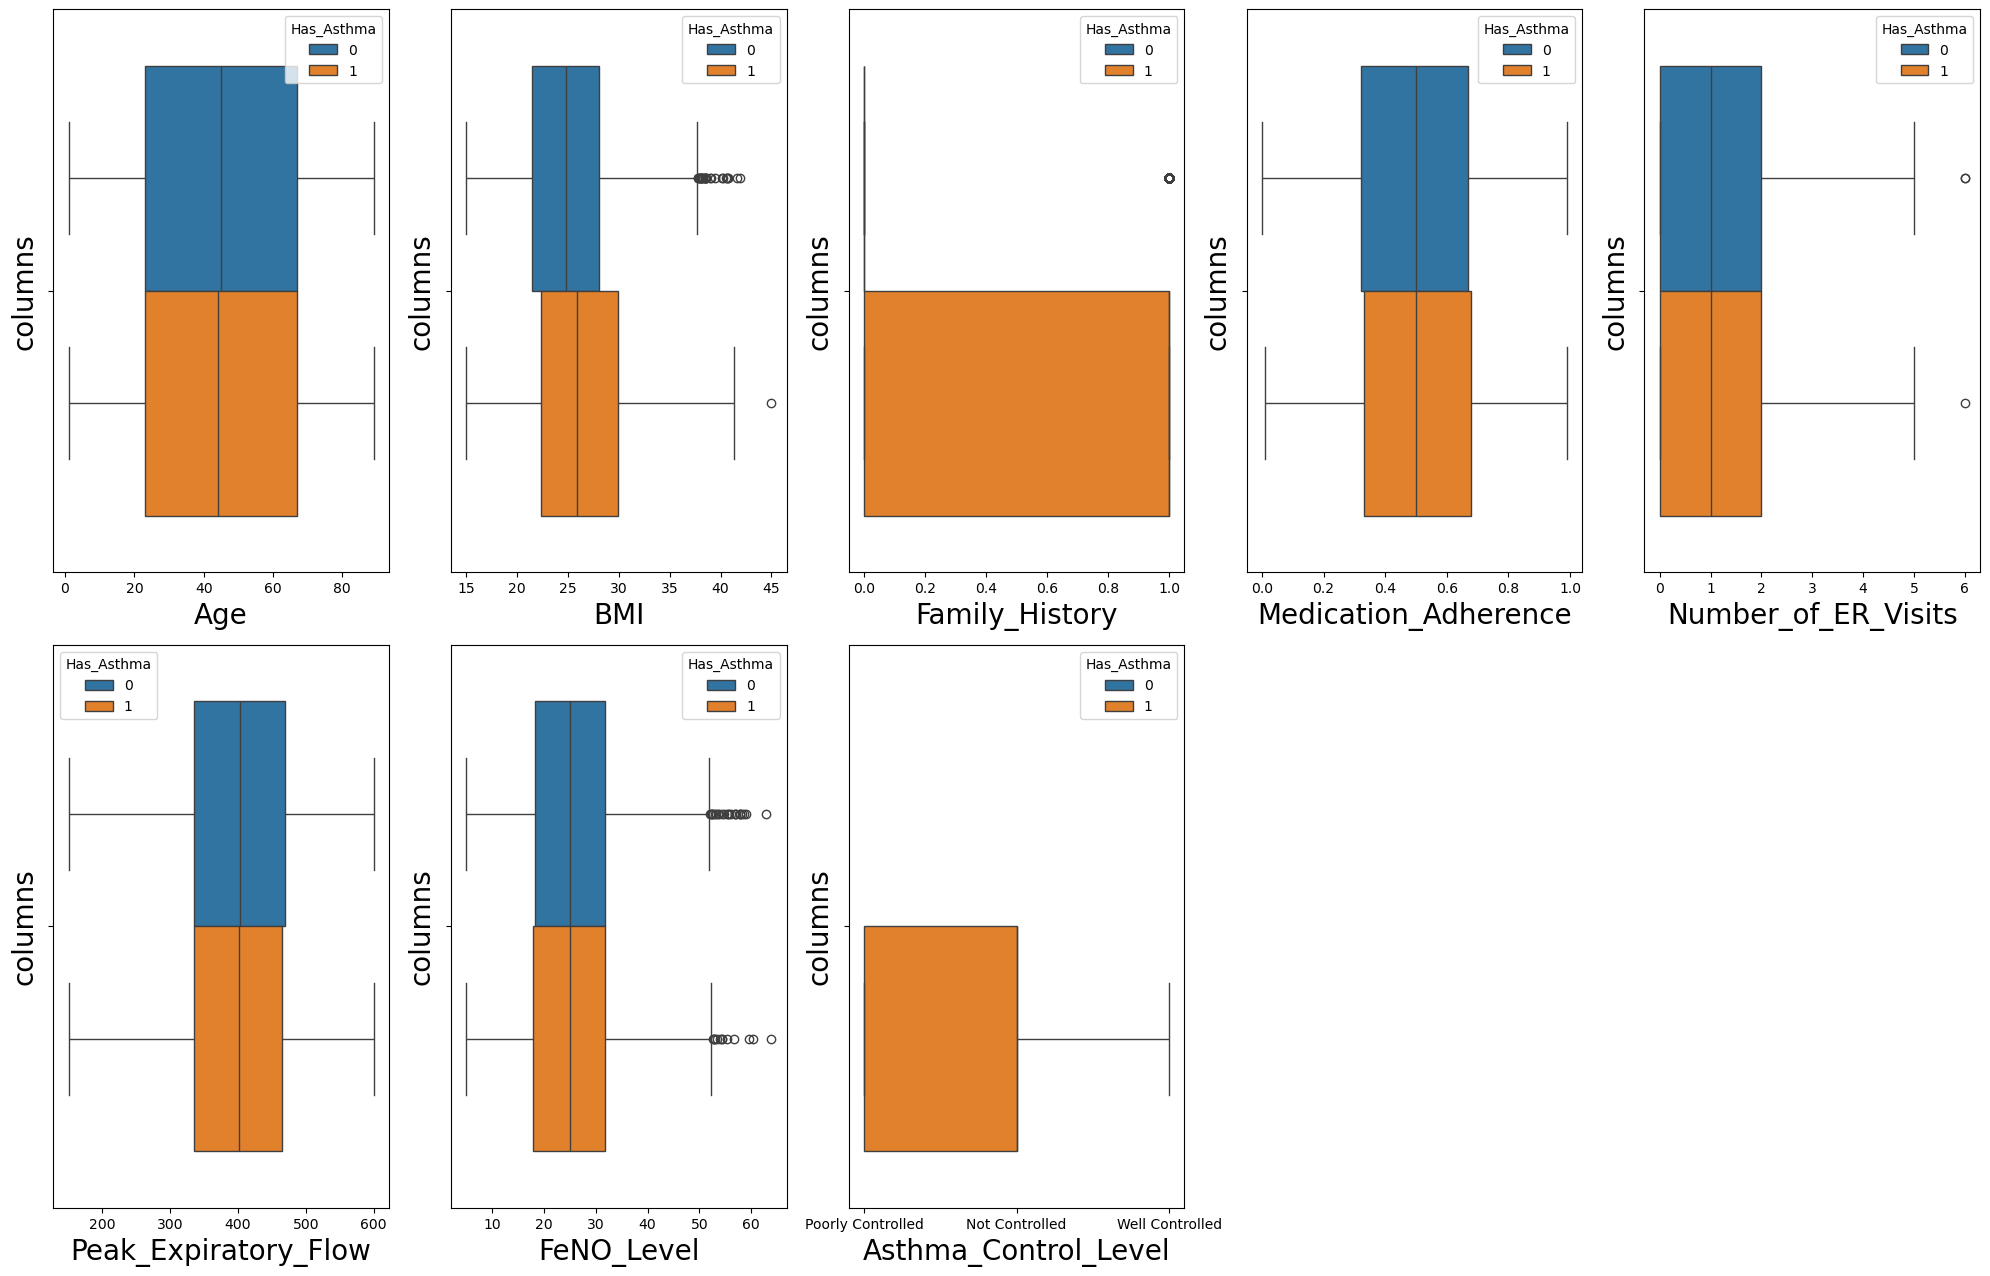

In [49]:
plt.figure(figsize=(20, 25), facecolor='white')  # Set the canvas size and background
plotnumber = 1  # Initialize subplot counter

for column in data1.columns:  # Iterate through each column of the DataFrame
    if plotnumber <= 10:
        ax = plt.subplot(4, 5, plotnumber)  # Create a subplot in a 3x2 grid
        sns.boxplot(x=data1[column], hue=data['Has_Asthma'])  # Countplot with hue
        plt.xlabel(column, fontsize=20)  # Set x-axis label
        plt.ylabel('columns', fontsize=20)  # Set y-axis label
        plotnumber += 1  # Increment counter

plt.tight_layout()  # Prevent overlapping of plots
plt.show()  # Display the figure

# Handling Outliers

Number of outliers in 'price': 24


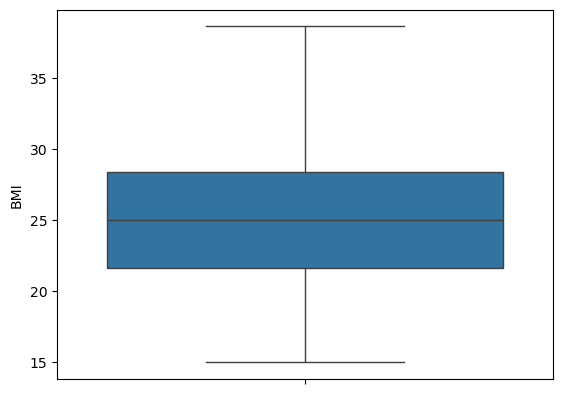

In [50]:
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['BMI'] < lower_bound) | (data['BMI'] > upper_bound)]
print(f"Number of outliers in 'price': {outliers.shape[0]}")

# Handling outliers
data['BMI'] = data['BMI'].clip(lower=lower_bound, upper=upper_bound)

sns.boxplot(data=data,y="BMI")
plt.show()

# Preprocessing

In [51]:
data

,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,52,Female,27.6,Former,1,Unknown,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,Not Asthma
1,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,Not Asthma
2,72,Female,17.6,Never,0,Unknown,Moderate,Moderate,Indoor,Unknown,0.38,0,303.3,15.3,0,Not Asthma
3,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,21,Male,30.2,Never,0,Unknown,Moderate,Active,Indoor,Unknown,0.82,3,535.0,27.7,0,Not Asthma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,Male,25.0,Never,0,Unknown,Low,Sedentary,Indoor,Unknown,0.67,0,580.6,18.7,0,Not Asthma
9996,78,Female,24.8,Never,0,Pollen,Low,Moderate,Indoor,Diabetes,0.72,1,417.6,40.8,0,Not Asthma
9997,58,Male,30.1,Former,1,Pollen,Low,Moderate,Indoor,Unknown,0.28,0,459.1,20.3,1,Not Controlled
9998,88,Female,31.2,Former,0,Pollen,Moderate,Moderate,Indoor,Unknown,0.44,0,415.9,25.0,0,Not Asthma


# Encoding

In [52]:
data.drop('Asthma_Control_Level',axis=1,inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   BMI                      10000 non-null  float64
 3   Smoking_Status           10000 non-null  object 
 4   Family_History           10000 non-null  int64  
 5   Allergies                10000 non-null  object 
 6   Air_Pollution_Level      10000 non-null  object 
 7   Physical_Activity_Level  10000 non-null  object 
 8   Occupation_Type          10000 non-null  object 
 9   Comorbidities            10000 non-null  object 
 10  Medication_Adherence     10000 non-null  float64
 11  Number_of_ER_Visits      10000 non-null  int64  
 12  Peak_Expiratory_Flow     10000 non-null  float64
 13  FeNO_Level               10000 non-null  float64
 14  Has_Asthma             

In [54]:
# Strip whitespace and standardize column names
data.columns = data.columns.str.strip().str.replace(" ", "_").str.lower()

In [55]:
data= pd.get_dummies(data, columns=[
    'gender',
    'smoking_status',
    'allergies',
    'air_pollution_level',
    'physical_activity_level',
    'occupation_type',
    'comorbidities'
])

In [56]:
data

,age,bmi,family_history,medication_adherence,number_of_er_visits,peak_expiratory_flow,feno_level,has_asthma,gender_Female,gender_Male,...,air_pollution_level_Moderate,physical_activity_level_Active,physical_activity_level_Moderate,physical_activity_level_Sedentary,occupation_type_Indoor,occupation_type_Outdoor,comorbidities_Both,comorbidities_Diabetes,comorbidities_Hypertension,comorbidities_Unknown
0,52,27.6,1,0.38,0,421.0,46.0,0,True,False,...,True,False,False,True,False,True,False,True,False,False
1,15,24.6,0,0.60,2,297.6,22.9,0,False,True,...,False,False,True,False,True,False,True,False,False,False
2,72,17.6,0,0.38,0,303.3,15.3,0,True,False,...,True,False,True,False,True,False,False,False,False,True
3,61,16.8,0,0.60,1,438.0,40.1,1,False,True,...,False,False,False,True,False,True,True,False,False,False
4,21,30.2,0,0.82,3,535.0,27.7,0,False,True,...,True,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,25.0,0,0.67,0,580.6,18.7,0,False,True,...,False,False,False,True,True,False,False,False,False,True
9996,78,24.8,0,0.72,1,417.6,40.8,0,True,False,...,False,False,True,False,True,False,False,True,False,False
9997,58,30.1,1,0.28,0,459.1,20.3,1,False,True,...,False,False,True,False,True,False,False,False,False,True
9998,88,31.2,0,0.44,0,415.9,25.0,0,True,False,...,True,False,True,False,True,False,False,False,False,True


In [57]:
x = data.drop(['has_asthma'],axis=1)
x

,age,bmi,family_history,medication_adherence,number_of_er_visits,peak_expiratory_flow,feno_level,gender_Female,gender_Male,gender_Other,...,air_pollution_level_Moderate,physical_activity_level_Active,physical_activity_level_Moderate,physical_activity_level_Sedentary,occupation_type_Indoor,occupation_type_Outdoor,comorbidities_Both,comorbidities_Diabetes,comorbidities_Hypertension,comorbidities_Unknown
0,52,27.6,1,0.38,0,421.0,46.0,True,False,False,...,True,False,False,True,False,True,False,True,False,False
1,15,24.6,0,0.60,2,297.6,22.9,False,True,False,...,False,False,True,False,True,False,True,False,False,False
2,72,17.6,0,0.38,0,303.3,15.3,True,False,False,...,True,False,True,False,True,False,False,False,False,True
3,61,16.8,0,0.60,1,438.0,40.1,False,True,False,...,False,False,False,True,False,True,True,False,False,False
4,21,30.2,0,0.82,3,535.0,27.7,False,True,False,...,True,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,25.0,0,0.67,0,580.6,18.7,False,True,False,...,False,False,False,True,True,False,False,False,False,True
9996,78,24.8,0,0.72,1,417.6,40.8,True,False,False,...,False,False,True,False,True,False,False,True,False,False
9997,58,30.1,1,0.28,0,459.1,20.3,False,True,False,...,False,False,True,False,True,False,False,False,False,True
9998,88,31.2,0,0.44,0,415.9,25.0,True,False,False,...,True,False,True,False,True,False,False,False,False,True


In [58]:
y= data['has_asthma']
y

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: has_asthma, Length: 10000, dtype: int64

In [59]:
#splitting the data into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,random_state=42)

In [60]:
x_train

,age,bmi,family_history,medication_adherence,number_of_er_visits,peak_expiratory_flow,feno_level,gender_Female,gender_Male,gender_Other,...,air_pollution_level_Moderate,physical_activity_level_Active,physical_activity_level_Moderate,physical_activity_level_Sedentary,occupation_type_Indoor,occupation_type_Outdoor,comorbidities_Both,comorbidities_Diabetes,comorbidities_Hypertension,comorbidities_Unknown
4901,50,26.2,0,0.49,0,378.2,29.7,False,True,False,...,True,False,True,False,True,False,False,True,False,False
4375,2,22.9,0,0.43,1,372.2,29.7,True,False,False,...,True,True,False,False,True,False,False,True,False,False
6698,34,29.0,0,0.37,2,346.7,27.2,False,True,False,...,False,False,False,True,True,False,False,False,False,True
9805,51,25.1,0,0.24,0,360.6,16.0,True,False,False,...,True,False,False,True,False,True,False,False,True,False
1101,1,29.0,0,0.69,0,438.8,34.0,True,False,False,...,True,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,36,30.0,1,0.33,2,253.9,21.2,False,True,False,...,False,True,False,False,False,True,False,False,False,True
5191,73,37.8,1,0.40,1,394.0,22.7,False,True,False,...,False,False,False,True,True,False,False,False,False,True
5390,31,16.2,1,0.81,0,492.1,20.3,False,True,False,...,True,False,False,True,True,False,True,False,False,False
860,44,25.4,0,0.64,1,444.5,21.0,True,False,False,...,True,False,False,True,True,False,False,False,False,True


In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [72]:
# Check if balanced
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: has_asthma
0    5679
1    1821
Name: count, dtype: int64
After SMOTE: has_asthma
0    5679
1    5679
Name: count, dtype: int64


In [73]:
# Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(x_test)  # Don't fit on test set!

In [74]:
# 4. Train Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_resampled)

# 5. Predict and Evaluate
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1888
           1       1.00      0.96      0.98       612

    accuracy                           0.99      2500
   macro avg       0.99      0.98      0.99      2500
weighted avg       0.99      0.99      0.99      2500



In [76]:
print(y_train.value_counts())

has_asthma
0    5679
1    1821
Name: count, dtype: int64


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train on SMOTE + scaled data
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [78]:
y_pred_tree = tree_model.predict(X_test_scaled)

print("Decision Tree Performance on Test Set:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1888
           1       1.00      1.00      1.00       612

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



# Puring

In [79]:
y_train_pred_tree = tree_model.predict(X_train_scaled)
print("Decision Tree Performance on Training Set:")
print(classification_report(y_train_resampled, y_train_pred_tree))

Decision Tree Performance on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5679
           1       1.00      1.00      1.00      5679

    accuracy                           1.00     11358
   macro avg       1.00      1.00      1.00     11358
weighted avg       1.00      1.00      1.00     11358



In [82]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(
    max_depth=5,            # Limit how deep the tree can grow
    min_samples_split=10,   # Minimum samples to split a node
    min_samples_leaf=5,     # Minimum samples at a leaf node
    random_state=42
)
tree_model.fit(X_train_scaled, y_train_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [83]:
y_pred_pruned = tree_model.predict(X_test_scaled)

from sklearn.metrics import classification_report
print("Pruned Decision Tree on Test Data:")
print(classification_report(y_test, y_pred_pruned))

Pruned Decision Tree on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1888
           1       0.94      0.99      0.96       612

    accuracy                           0.98      2500
   macro avg       0.97      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



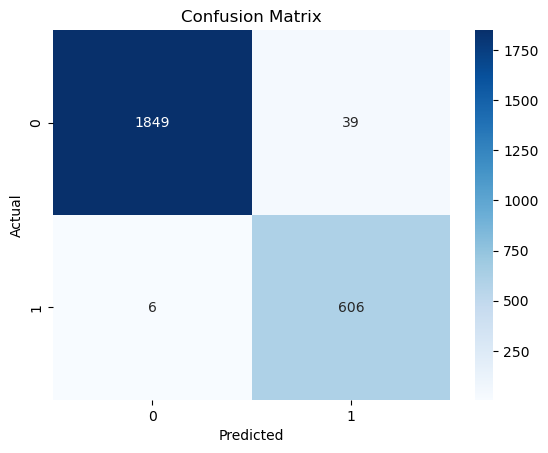

In [85]:
cm = confusion_matrix(y_test, y_pred_pruned)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Conclusion

### 1) In this project, we developed and evaluated multiple classification models to predict the presence of asthma based on a synthetic dataset. After ### preprocessing the data using one-hot encoding, SMOTE was applied to balance the class distribution. We experimented with Logistic Regression and Decision Tree classifiers.

### 2) Logistic Regression achieved a high accuracy of 99% on the test set, with a strong balance of precision and recall, and no signs of overfitting.

### 3) Decision Tree (unpruned) showed perfect performance on the training set (100%), but this indicated overfitting.

### 4) After applying pruning (by setting parameters like max_depth), the Decision Tree achieved a test accuracy of 98%, with a recall of 99% for ###  asthma cases slightly outperforming Logistic Regression in identifying positive cases.

### 5) Pruning significantly improved the model's ability to generalize, making it more reliable for real-world application.